<h1>IMPORTING LIBRARIES</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [4]:
default=pd.read_csv("UCI_Credit_Card.csv")
target_name = 'default.payment.next.month'
X = default.drop('default.payment.next.month', axis=1)
robust_scaler = RobustScaler() 
X = robust_scaler.fit_transform(X)
y=default[target_name]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

In [5]:
def CMatrix(CM, labels=['pay', 'default']):
    df=pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total']= df.sum(axis=1)
    return df

<h1>Data Frame for evaluation metrics</h1>

In [6]:
metrics=pd.DataFrame(index=['accuracy','precision','recall'],columns=['NULL','LogisticReg','ClassTree','NaiveBayes'])

<h1>Null Model</h1>

In [7]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy', 'NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test) 
metrics.loc['recall', 'NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)
CM= confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PREDICTION,pay,default,Total
TRUE,,,
pay,3505,0,3505
default,995,0,995
Total,4500,0,4500


<h1>Logistic Regression</h1>

In [8]:
#1. Import the estimator object model
from sklearn.linear_model import LogisticRegression
#2. Create an instance of the estimator 
logistic_regression=LogisticRegression(n_jobs=-1, random_state=15)
#3. Use the trainning data to train the estimator 
logistic_regression.fit(X_train, y_train)
#4. Evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy', 'LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM=confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3427,78,3505
default,779,216,995
Total,4206,294,4500


<h1>Clasification Trees</h1>

In [9]:
#1. Import the estimator object (model) 
from sklearn.tree import DecisionTreeClassifier
#2. Create an instance of the estimator
class_tree=DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)
#3. Use the trainning data to train the estimator
class_tree.fit(X_train, y_train)
#4. Evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy', 'ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test) 
metrics.loc['precision', 'ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM=confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3186,319,3505
default,631,364,995
Total,3817,683,4500


<h1>Naive Bayes Classifier</h1>

In [10]:
#1. Import the estimator object (model) 
from sklearn.naive_bayes import GaussianNB
#2. Create an instance of the estimator 
NBC=GaussianNB()
#3. Use the trainning data to train the estimator 
NBC.fit(X_train, y_train)
#4. Evaluate the model
y_pred_test = NBC.predict(X_test) 
metrics.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test) 
metrics.loc['precision', 'NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test) 
CMatrix(CM)


PREDICTION,pay,default,Total
TRUE,,,
pay,2663,842,3505
default,354,641,995
Total,3017,1483,4500


In [11]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,77.888889,80.955556,78.888889,73.422222
precision,0.0,73.469388,53.29429,43.223196
recall,0.0,21.708543,36.582915,64.422111


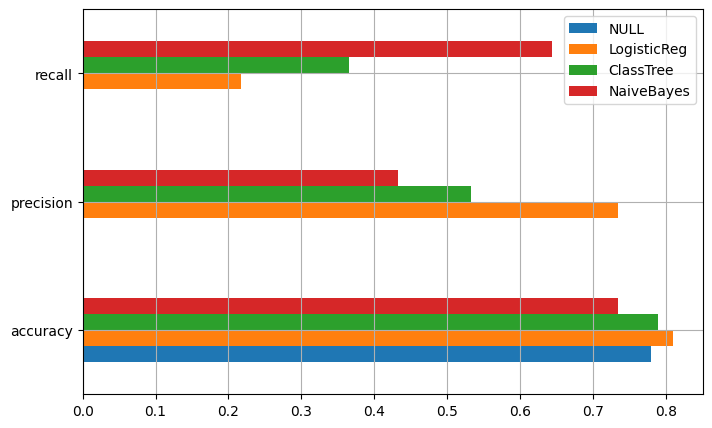

In [12]:
fig, ax = plt.subplots (figsize=(8,5))
metrics.plot(kind='barh', ax=ax) 
ax.grid();

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


Text(0.5, 0, 'Precision')

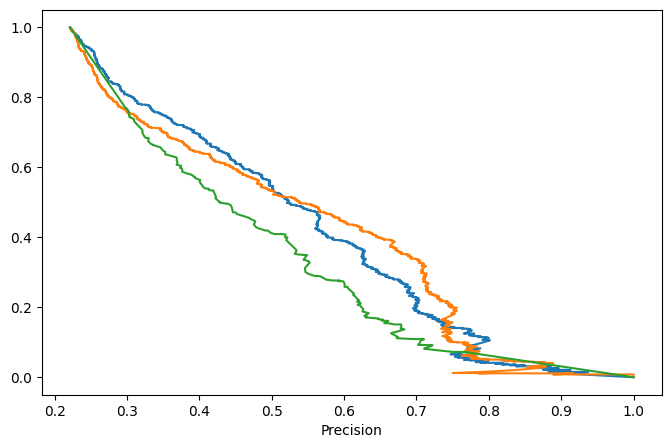

In [13]:
precision_nb, recall_nb, thresholds_nb=precision_recall_curve(y_true=y_test,probas_pred=NBC.predict_proba(X_test)[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test,probas_pred=logistic_regression.predict_proba(X_test)[:,1])
precision_dr, recall_dr, thresholds_dr = precision_recall_curve(y_true=y_test,probas_pred=class_tree.predict_proba(X_test)[:,1])
fig, ax= plt.subplots (figsize=(8,5))
ax.plot(precision_nb, recall_nb, label='NaiveBayes')
ax.plot(precision_lr, recall_lr, label='LogisticReg')
ax.plot(precision_dr, recall_dr, label='Decisiontree')
ax.set_xlabel('Precision')

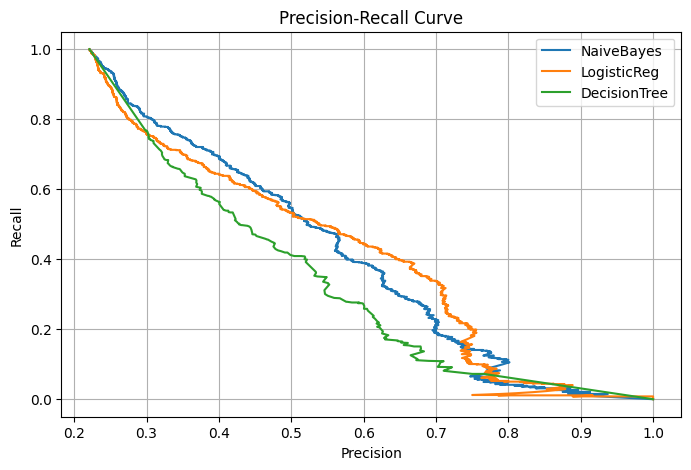

In [14]:
fig, ax=plt.subplots (figsize=(8,5))
ax.plot(precision_nb, recall_nb, label='NaiveBayes')
ax.plot(precision_lr, recall_lr, label='LogisticReg')
ax.plot(precision_dr, recall_dr, label='DecisionTree')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
#ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

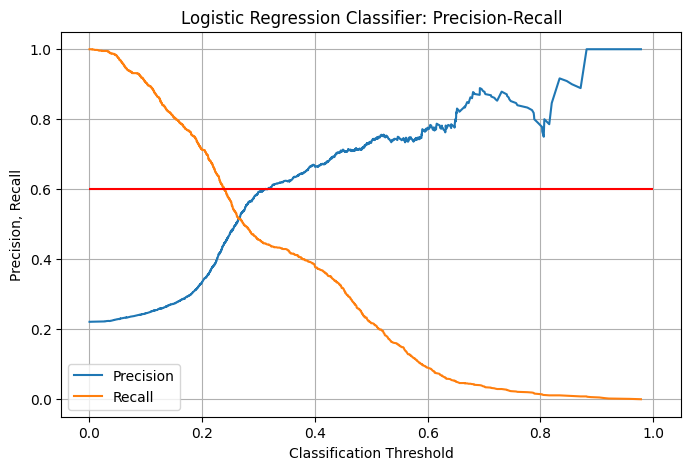

In [15]:
fig, ax=plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr [1:], label='Precision')
ax.plot(thresholds_lr, recall_lr [1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines (y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

In [16]:
y_pred_proba = logistic_regression.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.2).astype('int')
#Confusion matrix
CM=confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall: ", 100*recall_score(y_pred=y_pred_test, y_true=y_test)) 
print("Precision: ", 100*precision_score(y_pred=y_pred_test, y_true=y_test)) 
CMatrix(CM)

Recall:  71.25628140703517
Precision:  33.47497639282342


PREDICTION,pay,default,Total
TRUE,,,
pay,2096,1409,3505
default,286,709,995
Total,2382,2118,4500


In [17]:
def make_ind_prediction(new_data):
    data=new_data.values.reshape(1,-1) 
    data=robust_scaler.transform(data)
    prob=logistic_regression.predict_proba(data)[0][1]
    if prob>= 0.21:
        return "will default"
    else: 
        return "will pay"

In [18]:
pay=default[default['default.payment.next.month']==0]

In [19]:
pay.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [20]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal',4000),('age',50),('bill_amt1',500),
                            ('bill_amt2',35509),('bill_amt3',689),('bill_amt4',0),
                            ('bill_amt5',0),('bill_amt6',00),('pay_amt1',0),('pay_amt2',35509),('pay_amt5',0),('pay_amt6',0),
                            ('male',1),('grad_school',0),('university',1),('high_school',0),('married',1),('female',0),
                            ('pay_0',-1),('pay_2',-1),('pay_3',-1),('pay_4',0),('pay_5',-1),('pay_6',0)])
new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


'will pay'